In [1]:
import sys
sys.path.append("..")

In [2]:
from math import nan
from pathlib import Path
from wandb_utils import Metrics, load_data, plot, simple_concat
from wandb_downloader import RunsDownloader

In [3]:
wandb = RunsDownloader(project="fdm-hydra")

In [4]:
results_dir = Path("../../results/cmnist/2v4/mildly_subs_miss_s-0.5cont-more_data/")

baselines = load_data(
#     results_dir / "ranking-fdm.kvq_3discs.batching.mildly_subs_miss_s.csv",
#     results_dir / "ranking-fdm.kvq_3discs.mildly_subs_miss_s.csv",
#     results_dir / "kmeans-fdm.kvq_3discs.batching.mildly_subs_miss_s.csv",
#     results_dir / "kmeans-fdm.kvq_3discs.mildly_subs_miss_s.csv",
#     results_dir / "no-cluster-fdm.kvq_3discs.batching.mildly_subs_miss_s.csv",
#     results_dir / "no-cluster-fdm.kvq_3discs.mildly_subs_miss_s.csv",
#     results_dir / "perfect-cluster.kvq_3discs.batching.mildly_subs_miss_s.csv",
#     results_dir / "perfect-cluster.tue-sweep.3-discs.mildly_subs_miss_s.csv",

    results_dir / "cmnist_baseline_cnn_color_60epochs.csv",
#     results_dir / "cmnist_baseline_dro_color_eta_0.01_60epochs.csv",
    results_dir / "cmnist_baseline_dro_color_eta_0.1_60epochs.csv",
#     results_dir / "cmnist_baseline_dro_color_eta_0.3_60epochs.csv",
#     results_dir / "cmnist_baseline_dro_color_eta_1.0_60epochs.csv",
    results_dir / "cmnist_baseline_lff_color_60epochs.csv",

)

In [5]:
ours = wandb.groups(
    "ranking-fdm.gated_bg8.mildly_subs_miss_s",
    "kmeans-fdm.gated_bg8.mildly_subs_miss_s",
    "no-cluster-fdm.gated_bg8.mildly_subs_miss_s",
    "perfect-cluster.gated_bg8.mildly_subs_miss_s",
)

'ranking-fdm.gated_bg8.mildly_subs_miss_s': found 30 runs.
'kmeans-fdm.gated_bg8.mildly_subs_miss_s': found 30 runs.
'no-cluster-fdm.gated_bg8.mildly_subs_miss_s': found 30 runs.
'perfect-cluster.gated_bg8.mildly_subs_miss_s': found 30 runs.


In [6]:
overcluster = wandb.groups(
    "ranking-fdm-6.gated_bg8.mildly_subs_miss_s",
    "kmeans-fdm-6.gated_bg8.mildly_subs_miss_s",
    "ranking-fdm-8.gated_bg8.mildly_subs_miss_s",
    "kmeans-fdm-8.gated_bg8.mildly_subs_miss_s",
)

'ranking-fdm-6.gated_bg8.mildly_subs_miss_s': found 30 runs.
'kmeans-fdm-6.gated_bg8.mildly_subs_miss_s': found 30 runs.
'ranking-fdm-8.gated_bg8.mildly_subs_miss_s': found 30 runs.
'kmeans-fdm-8.gated_bg8.mildly_subs_miss_s': found 30 runs.


In [7]:
data = simple_concat(ours, baselines, overcluster)

In [7]:
plot_kwargs_alt = dict(
    file_format="pdf",
    fig_dim=(5, 2.5),
    file_prefix="cmnist_2v4_miss_s_alt_overcluster",
)

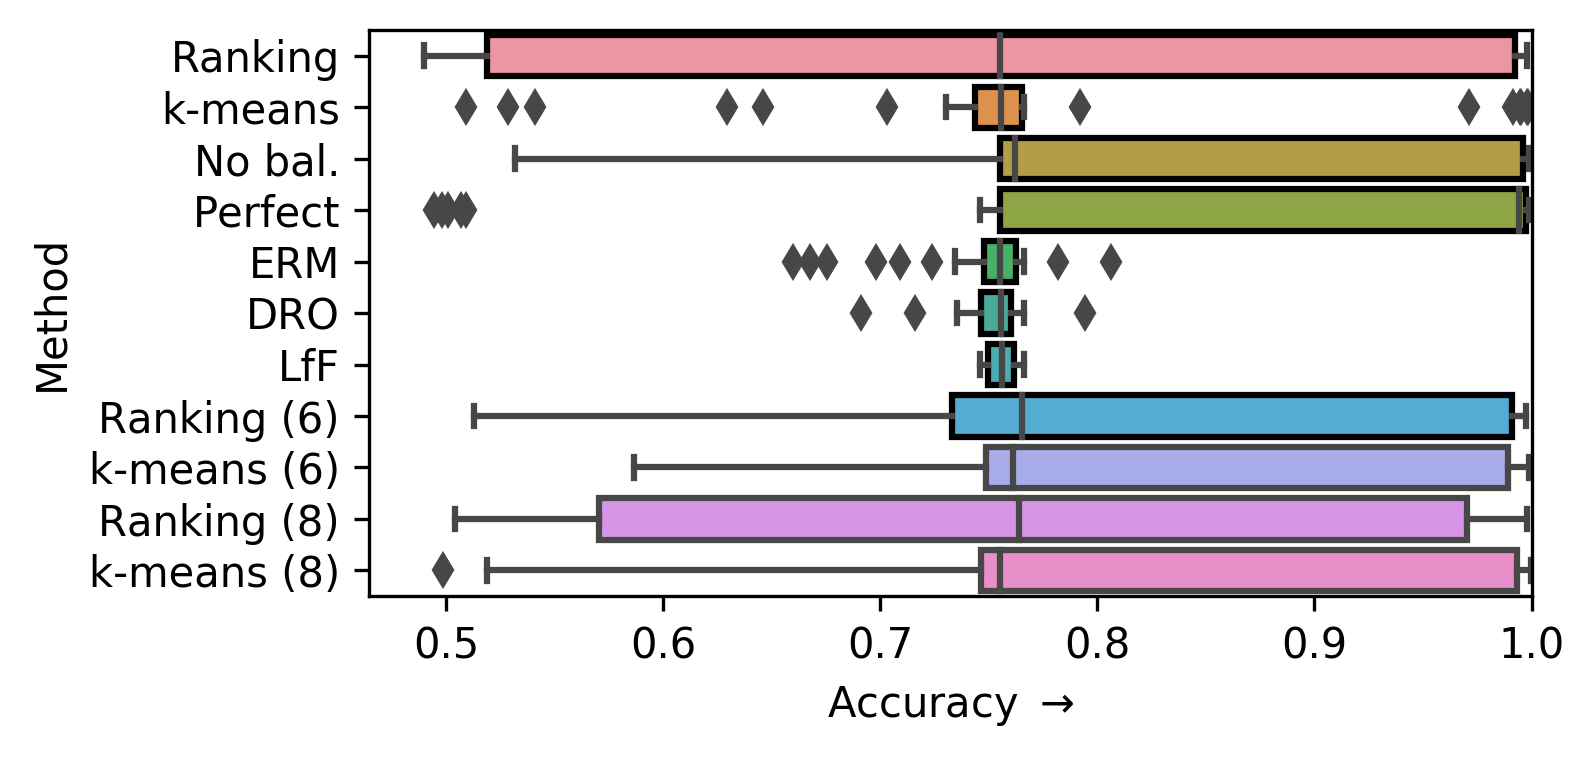

In [9]:
plot(data, metrics=[Metrics.acc], x_limits=(nan, 1), **plot_kwargs_alt)

In [10]:
ours_kvq = wandb.groups(
    "ranking-fdm.kvq_bg8.bin_zs.mildly_subs_miss_s",
    "kmeans-fdm.kvq_bg8.bin_zs.mildly_subs_miss_s",
    "no-cluster-fdm.kvq_bg8.bin_zs.mildly_subs_miss_s",
    "perfect-cluster.kvq_bg8.bin_zs.mildly_subs_miss_s",
)
overcluster_kvq = wandb.groups(
    "ranking-fdm-6.kvq_bg8.bin_zs.mildly_subs_miss_s",
    "kmeans-fdm-6.kvq_bg8.bin_zs.mildly_subs_miss_s",
    "ranking-fdm-8.kvq_bg8.bin_zs.mildly_subs_miss_s",
    "kmeans-fdm-8.kvq_bg8.bin_zs.mildly_subs_miss_s",
)
data_kvq = simple_concat(ours_kvq, baselines, overcluster_kvq)

'ranking-fdm.kvq_bg8.bin_zs.mildly_subs_miss_s': found 30 runs.
'kmeans-fdm.kvq_bg8.bin_zs.mildly_subs_miss_s': found 30 runs.
'no-cluster-fdm.kvq_bg8.bin_zs.mildly_subs_miss_s': found 30 runs.
'perfect-cluster.kvq_bg8.bin_zs.mildly_subs_miss_s': found 30 runs.
'ranking-fdm-6.kvq_bg8.bin_zs.mildly_subs_miss_s': found 30 runs.
'kmeans-fdm-6.kvq_bg8.bin_zs.mildly_subs_miss_s': found 30 runs.
'ranking-fdm-8.kvq_bg8.bin_zs.mildly_subs_miss_s': found 30 runs.
'kmeans-fdm-8.kvq_bg8.bin_zs.mildly_subs_miss_s': found 30 runs.


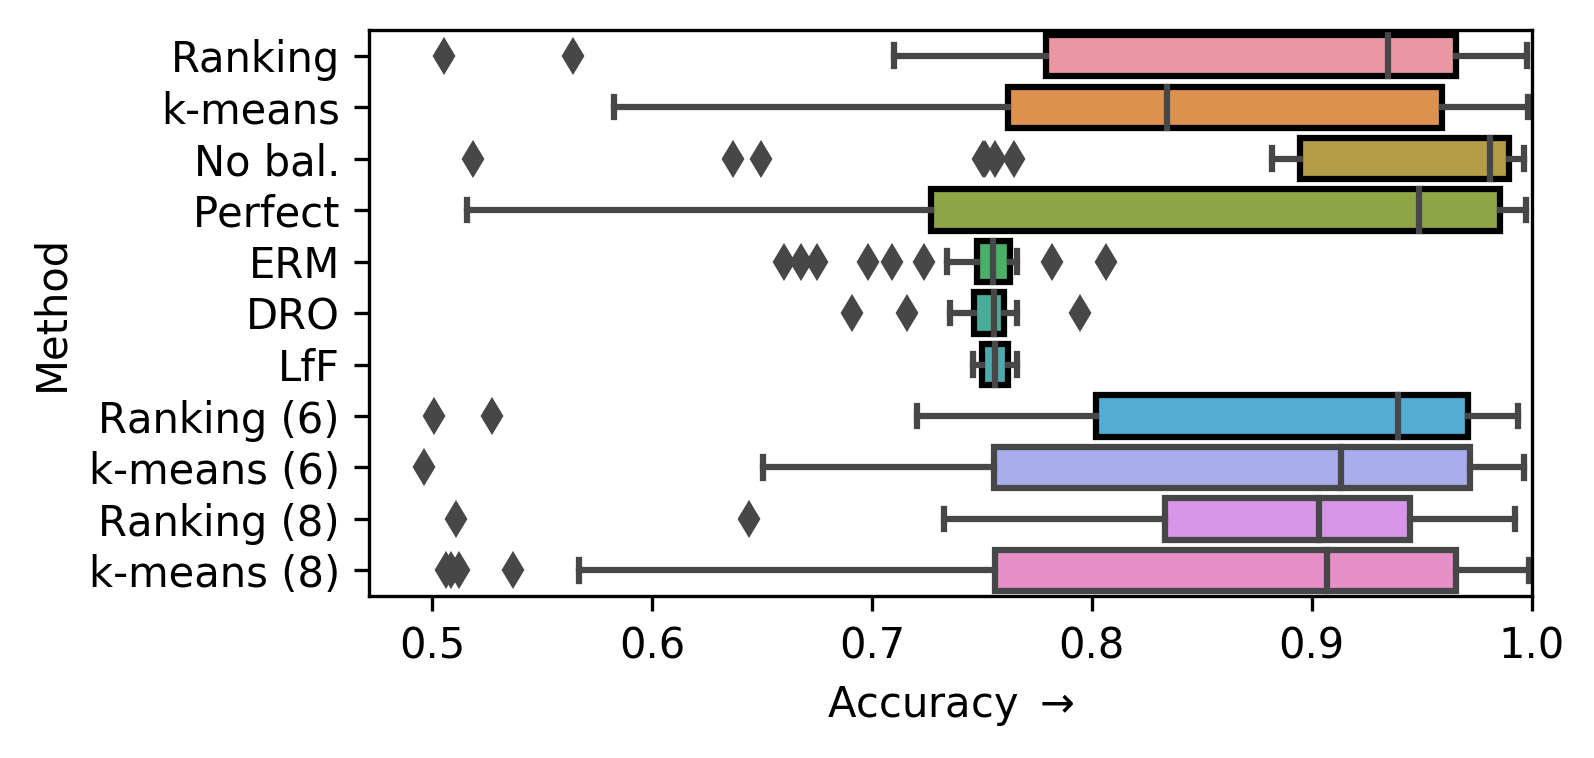

In [11]:
plot(data_kvq, metrics=[Metrics.acc], x_limits=(nan, 1), **plot_kwargs_alt)

In [5]:
ours_gat_bin = wandb.groups(
    "ranking-fdm.gated_bg8.bin_zs.mildly_subs_miss_s",
    "kmeans-fdm.gated_bg8.bin_zs.mildly_subs_miss_s",
    "no-cluster-fdm.gated_bg8.bin_zs.mildly_subs_miss_s",
    "perfect-cluster.gated_bg8.bin_zs.mildly_subs_miss_s",
)
overcluster_gat_bin = wandb.groups(
    "ranking-fdm-6.gated_bg8.bin_zs.mildly_subs_miss_s",
    "kmeans-fdm-6.gated_bg8.bin_zs.mildly_subs_miss_s",
    "ranking-fdm-8.gated_bg8.bin_zs.mildly_subs_miss_s",
    "kmeans-fdm-8.gated_bg8.bin_zs.mildly_subs_miss_s",
)
data_gat_bin = simple_concat(ours_gat_bin, baselines, overcluster_gat_bin)

'ranking-fdm.gated_bg8.bin_zs.mildly_subs_miss_s': found 30 runs.
'kmeans-fdm.gated_bg8.bin_zs.mildly_subs_miss_s': found 30 runs.
'no-cluster-fdm.gated_bg8.bin_zs.mildly_subs_miss_s': found 30 runs.
'perfect-cluster.gated_bg8.bin_zs.mildly_subs_miss_s': found 30 runs.
'ranking-fdm-6.gated_bg8.bin_zs.mildly_subs_miss_s': found 30 runs.
'kmeans-fdm-6.gated_bg8.bin_zs.mildly_subs_miss_s': found 23 runs.
'ranking-fdm-8.gated_bg8.bin_zs.mildly_subs_miss_s': found 0 runs.
'kmeans-fdm-8.gated_bg8.bin_zs.mildly_subs_miss_s': found 0 runs.


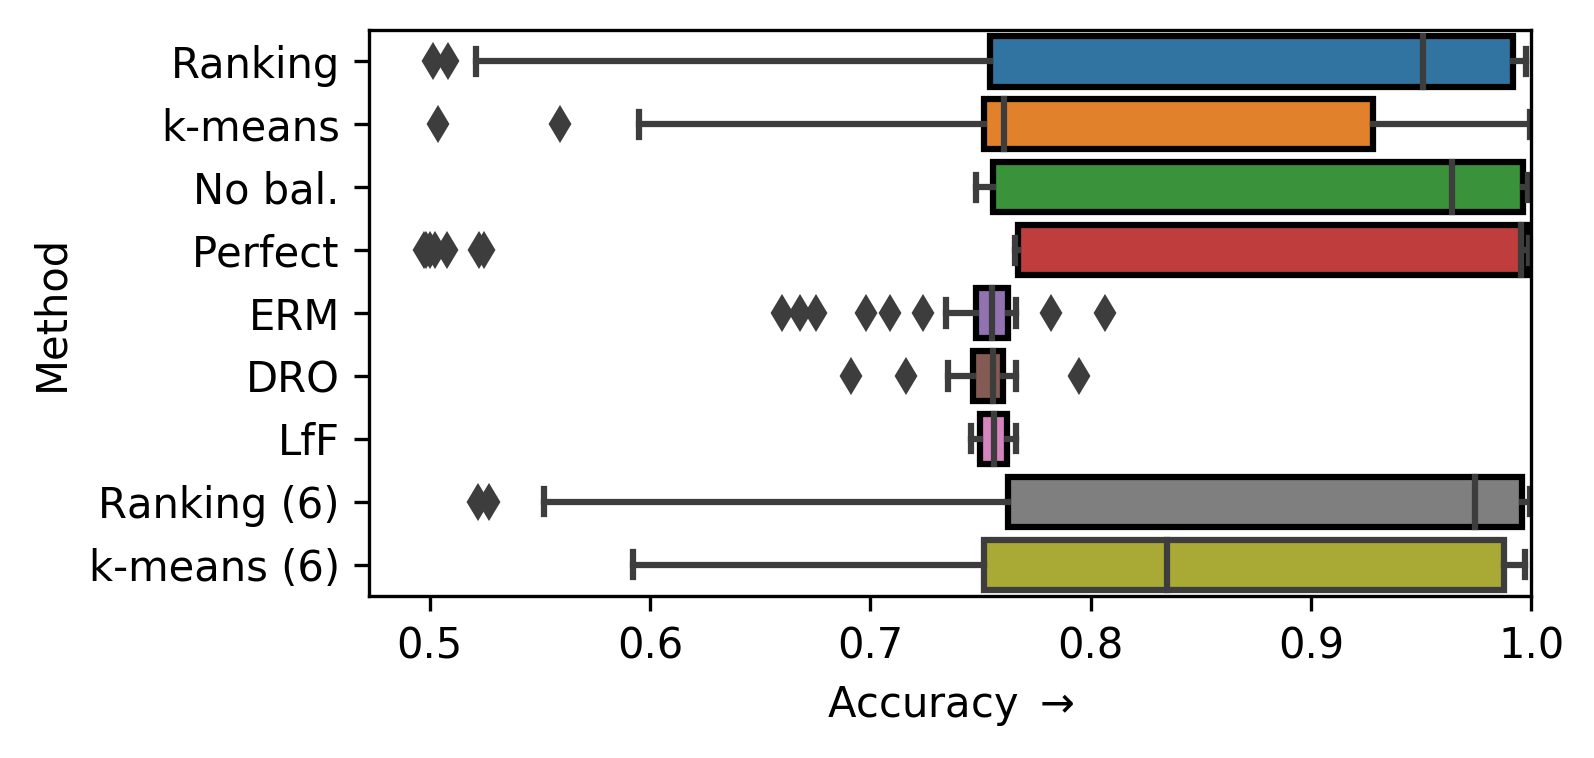

In [8]:
plot(data_gat_bin, metrics=[Metrics.acc], x_limits=(nan, 1), **plot_kwargs_alt)

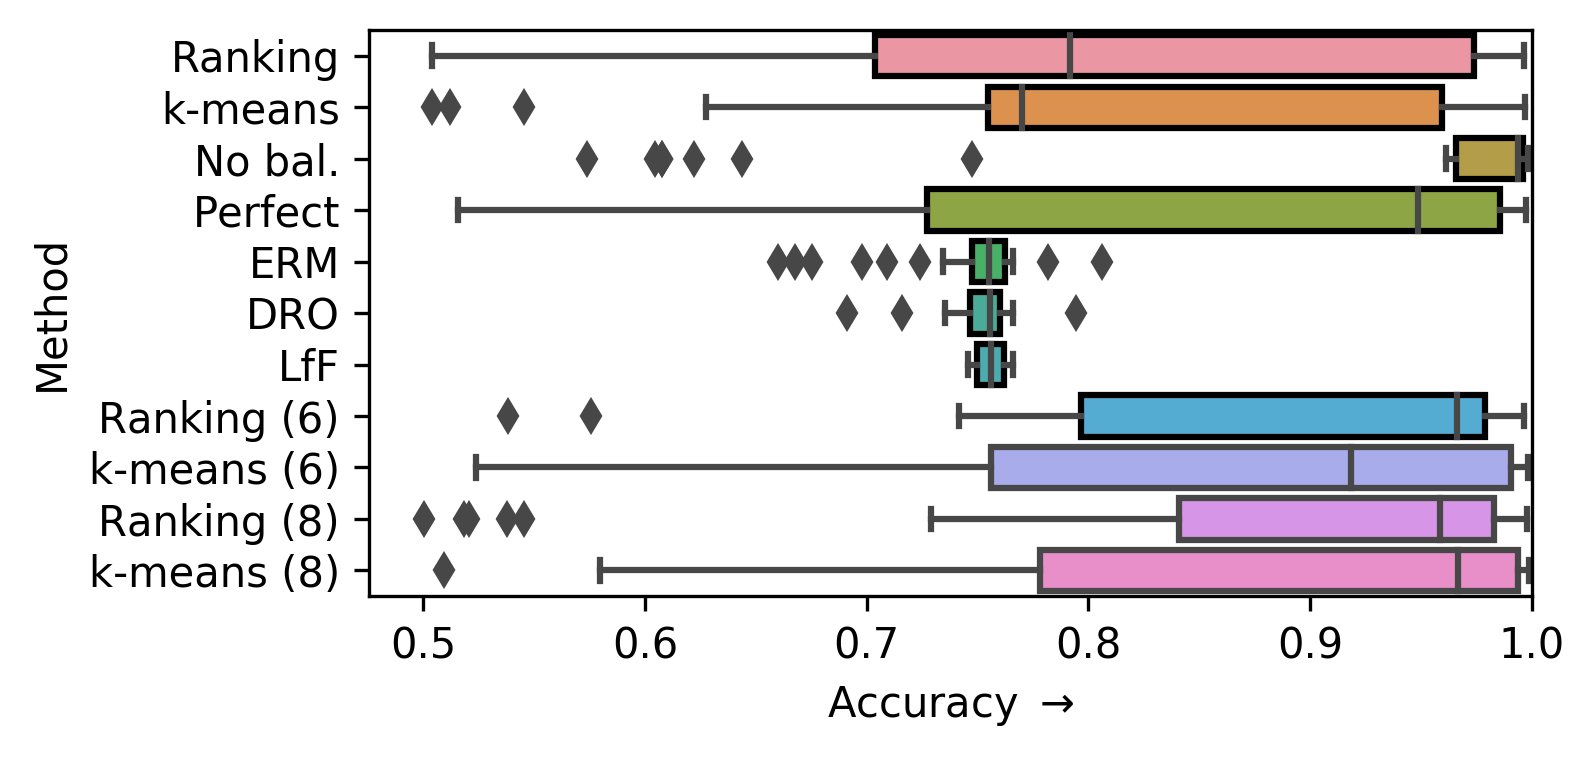

In [22]:
plot(data, metrics=[Metrics.acc], x_limits=(nan, 1), **plot_kwargs_alt)

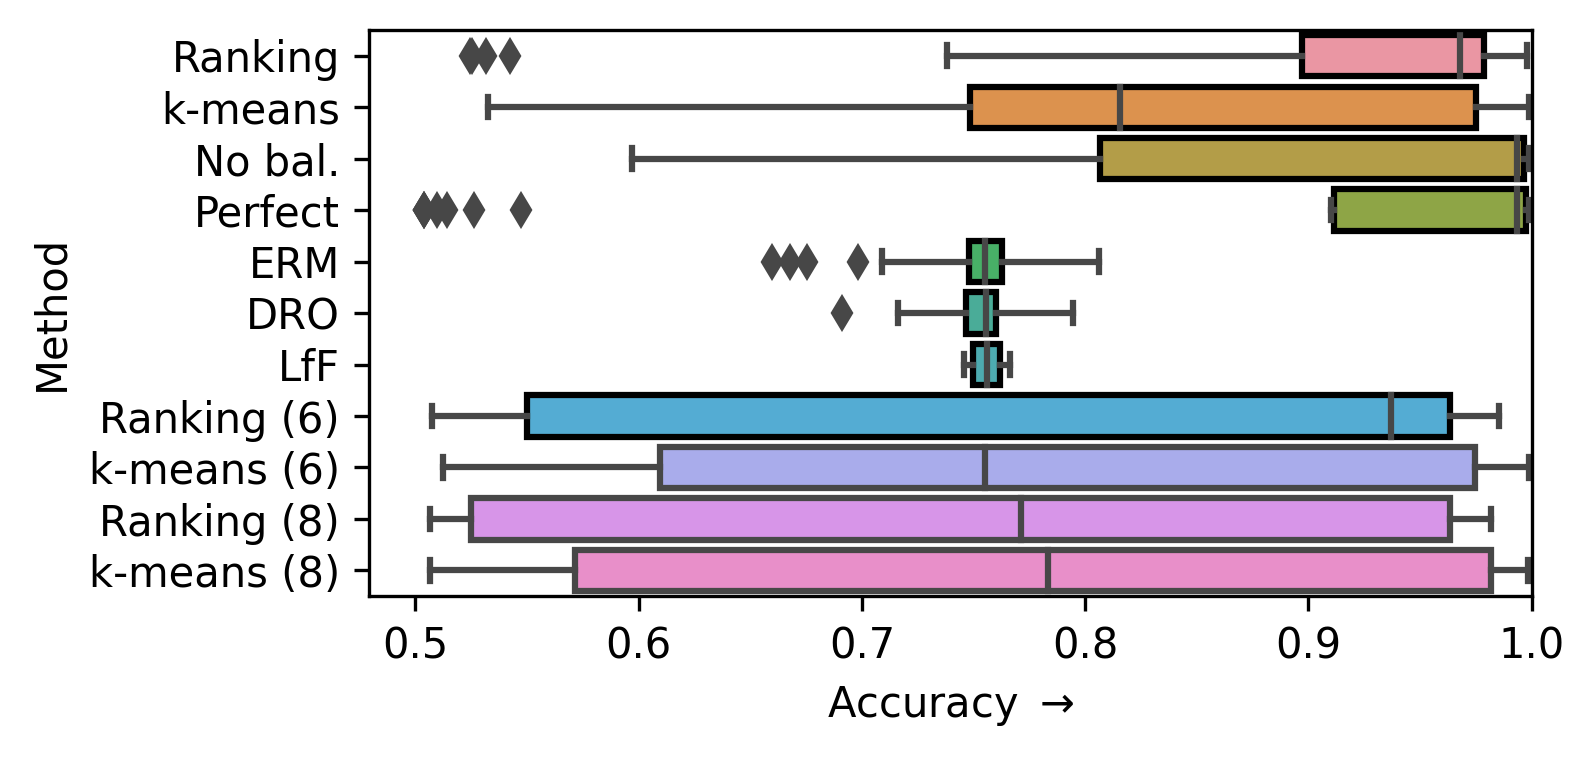

In [15]:
plot(data_alt, metrics=[Metrics.acc], x_limits=(nan, 1), **plot_kwargs_alt)

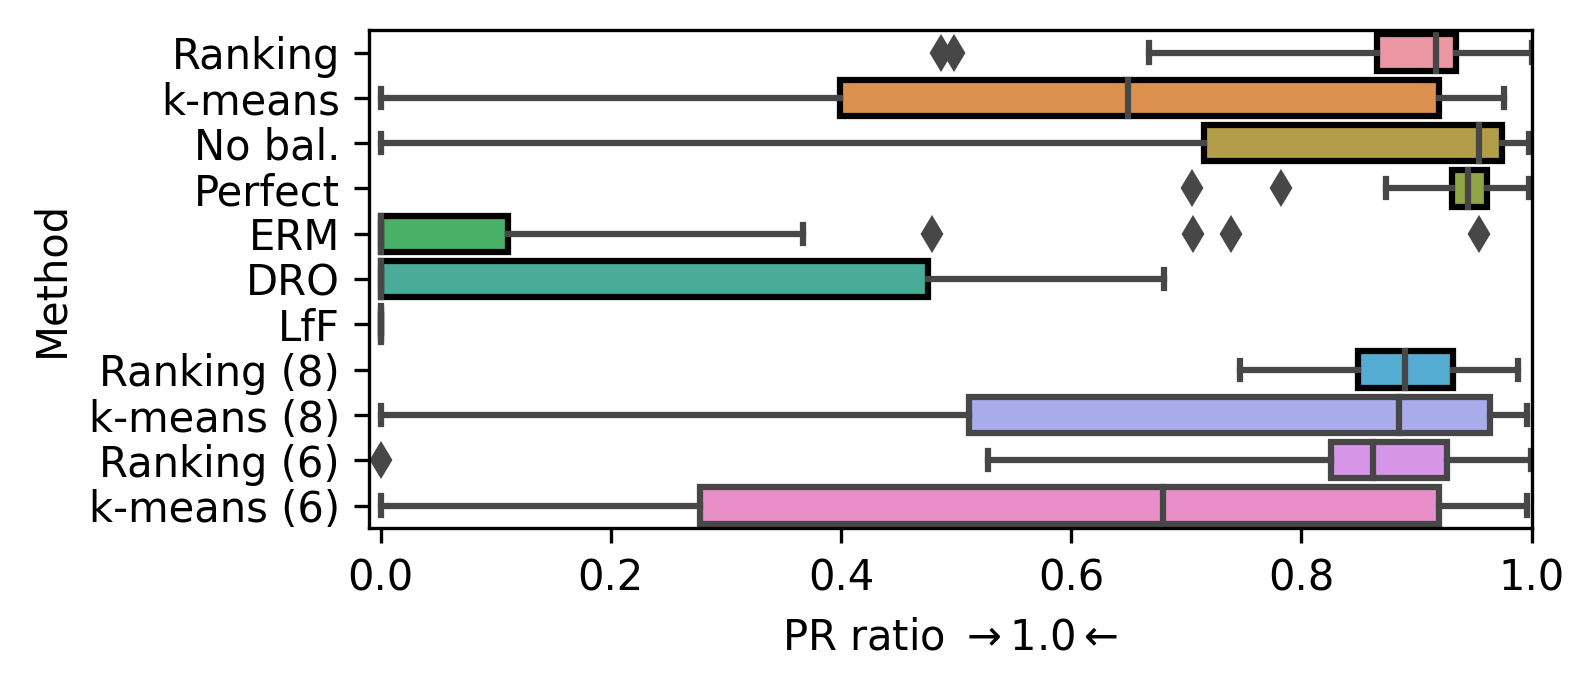

In [7]:
plot(data_alt, metrics=[Metrics.prr], x_limits=(-0.01, 1), **plot_kwargs_alt)

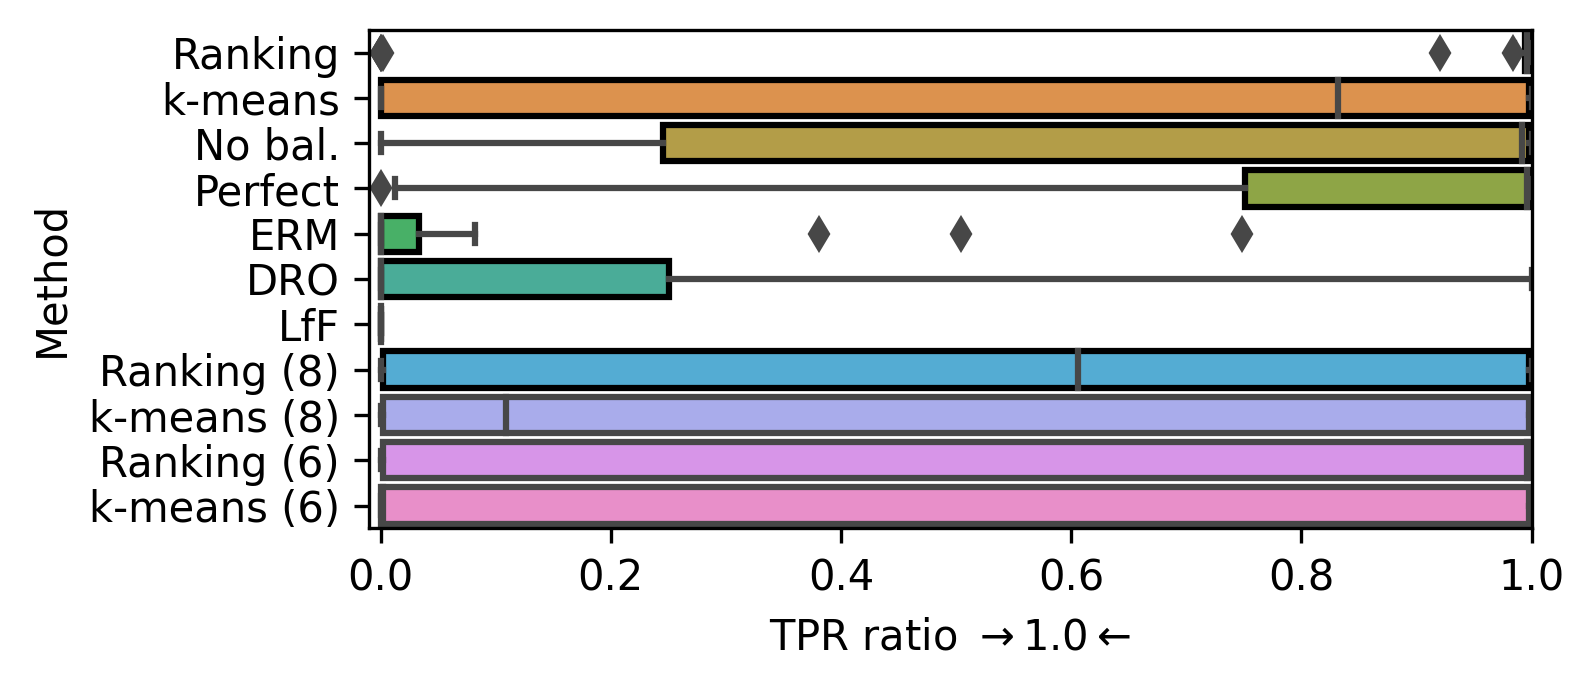

In [8]:
plot(data_alt, metrics=[Metrics.tprr], x_limits=(-0.01, 1), **plot_kwargs_alt)

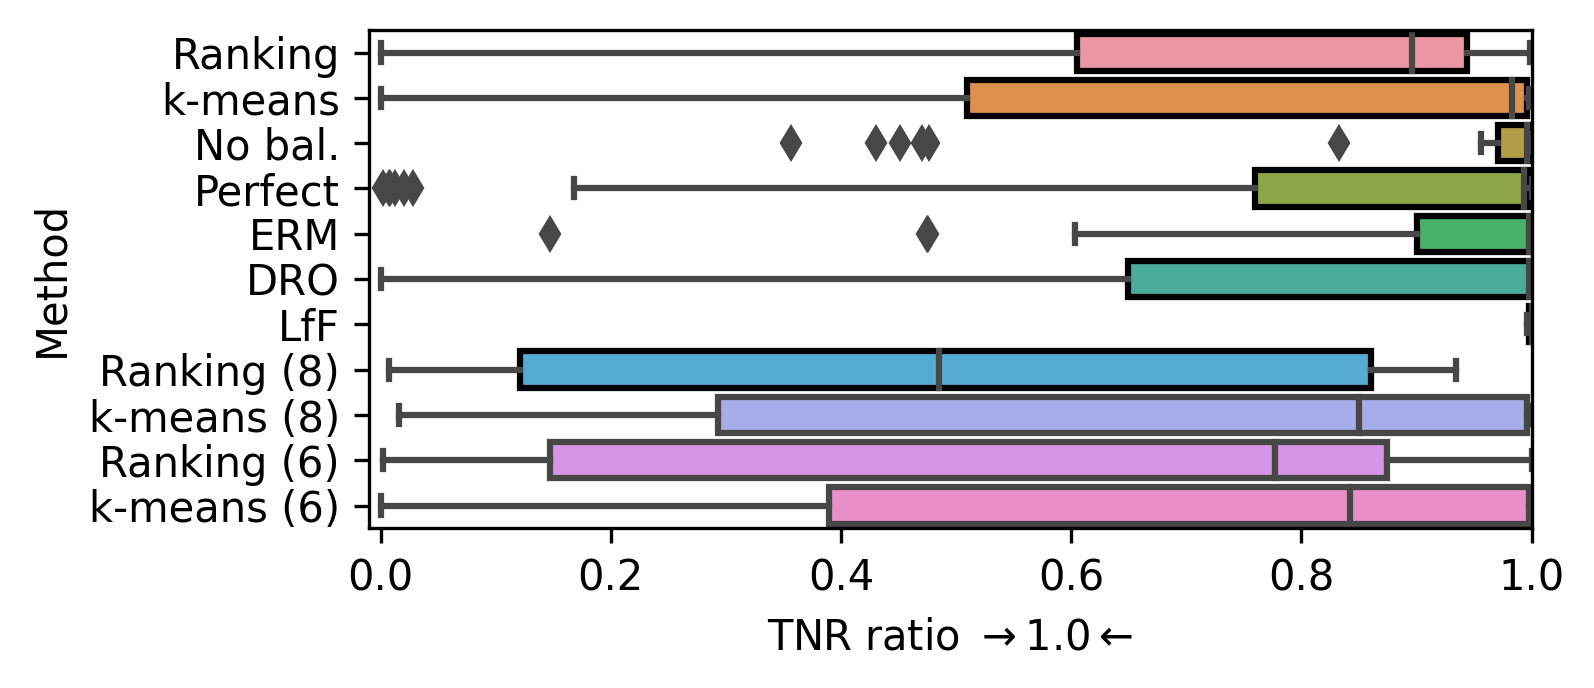

In [9]:
plot(data_alt, metrics=[Metrics.tnrr], x_limits=(-0.01, 1), **plot_kwargs_alt)